In [1]:
import os, pandas as pd, numpy as np

In [3]:
os.chdir("/Users/nanditareddy/Desktop/R BOOTCAMP/ASSIGNMENT A1")

In [4]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [5]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [6]:
SKM = df[df['state_1']=="SKM"]

In [7]:
SKM.isnull().sum().sort_values(ascending = False)

soyabean_q             768
soyabean_v             768
Meals_School           766
Meals_Employer         750
Otherwise_possessed    728
                      ... 
radish_q                 0
brinjal_q                0
tamato_q                 0
onion_q                  0
fv_tot                   0
Length: 384, dtype: int64

In [8]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [9]:
SKM_new = SKM[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [10]:
SKM_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       32
state_1              0
District             0
Sector               0
Region               0
State_Region         0
ricetotal_q          0
wheattotal_q         0
moong_q              0
Milktotal_q          0
chicken_q            0
bread_q              0
foodtotal_q          0
Beveragestotal_v     0
dtype: int64

In [11]:
SKM_clean =SKM_new.copy()

In [12]:
SKM_clean.loc[:, 'Meals_At_Home'] = SKM_clean['Meals_At_Home'].fillna(SKM_new['Meals_At_Home'].mean())

In [13]:
SKM_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [14]:
# Outlier Checking

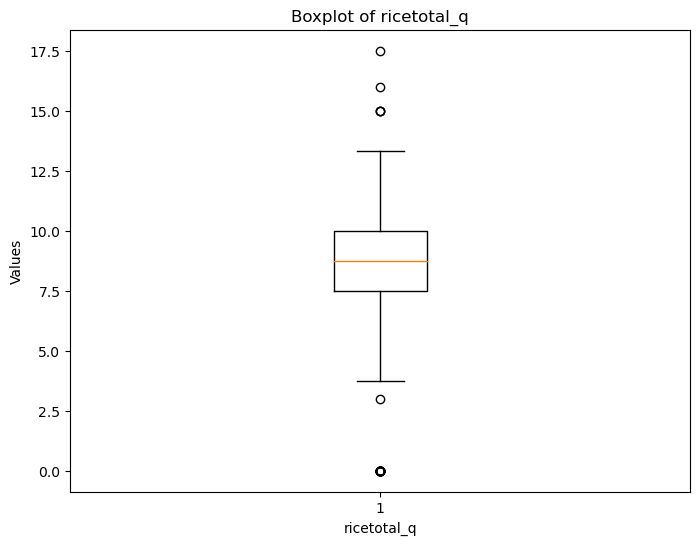

In [17]:
import matplotlib.pyplot as plt
# Assuming SKM_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(SKM_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [19]:
rice1 = SKM_clean['ricetotal_q'].quantile(0.25)
rice2 = SKM_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [20]:
SKM_clean=SKM_new[(SKM_new['ricetotal_q']<=up_limit)&(SKM_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x12d1a8b10>,
 'caps': [<matplotlib.lines.Line2D at 0x12d1c0c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x12d1abdd0>],
 'medians': [<matplotlib.lines.Line2D at 0x12d1c1250>],
 'fliers': [<matplotlib.lines.Line2D at 0x12d1c3e50>],
 'means': []}

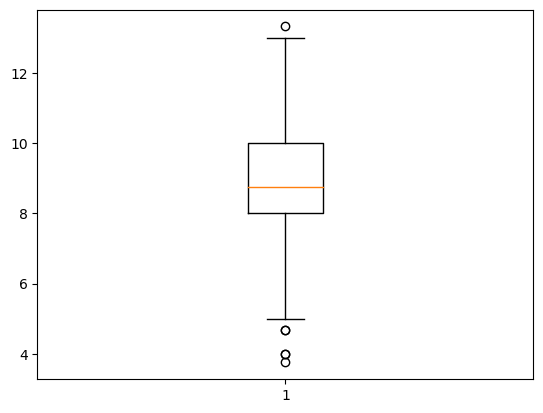

In [21]:
plt.boxplot(SKM_clean['ricetotal_q'])

In [22]:
SKM_clean['District'].unique()

array([4, 3, 1, 2])

In [23]:
# Replace values in the 'Sector' column
SKM_clean.loc[:,'Sector'] = SKM_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [24]:
#total consumption

In [25]:
SKM_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [26]:
SKM_clean.loc[:, 'total_consumption'] = SKM_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

/var/folders/_g/wq3y7vl53zb6n4srw89lbf300000gn/T/ipykernel_85921/1868395355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SKM_clean.loc[:, 'total_consumption'] = SKM_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)


In [27]:
SKM_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
28944,SKM,4,RURAL,1,111,9.000000,1.000000,0.0,0,1.000000,0.40,33.571025,45.000,54.0,89.971025
28945,SKM,4,RURAL,1,111,8.333333,1.333333,0.0,0,0.666667,0.00,26.900470,30.015,60.0,67.248803
28947,SKM,4,RURAL,1,111,6.400000,1.600000,0.0,0,0.400000,0.12,23.550369,31.000,60.0,63.070369
28948,SKM,4,RURAL,1,111,6.600000,0.400000,0.0,0,0.000000,0.08,20.874167,14.000,60.0,41.954167
28949,SKM,4,RURAL,1,111,7.500000,1.250000,0.0,0,0.500000,0.10,26.872926,30.000,60.0,66.222926


In [28]:
SKM_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                     std       mean         max        min
Region                                                    
1              22.300954  55.832124  325.000265  23.500375

In [29]:
SKM_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                29.016303  63.101539  186.600500  27.116800
2                25.530599  55.240384  325.000265  23.500375
3                18.613896  52.855302  198.054063  27.333383
4                19.085683  55.826463  184.416892  24.997257

In [30]:
total_consumption_by_districtcode=SKM_clean.groupby('District')['total_consumption'].sum()

In [31]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
4    15240.624305
2    10108.990214
3     9408.243839
Name: total_consumption, dtype: float64

In [32]:
SKM_clean.loc[:,"District"] = SKM_clean.loc[:,"District"].replace({4: "East", 2: "West", 3: "West"})

In [33]:
total_consumption_by_districtname=SKM_clean.groupby('District')['total_consumption'].sum()

In [34]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
West    19517.234053
East    15240.624305
1        5552.935390
Name: total_consumption, dtype: float64

In [35]:
from statsmodels.stats import weightstats as stests

In [36]:
rural=SKM_clean[SKM_clean['Sector']=="RURAL"]
urban=SKM_clean[SKM_clean['Sector']=="URBAN"]

In [37]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
28944,SKM,East,RURAL,1,111,9.000000,1.000000,0.0,0,1.000000,0.40,33.571025,45.000,54.0,89.971025
28945,SKM,East,RURAL,1,111,8.333333,1.333333,0.0,0,0.666667,0.00,26.900470,30.015,60.0,67.248803
28947,SKM,East,RURAL,1,111,6.400000,1.600000,0.0,0,0.400000,0.12,23.550369,31.000,60.0,63.070369
28948,SKM,East,RURAL,1,111,6.600000,0.400000,0.0,0,0.000000,0.08,20.874167,14.000,60.0,41.954167
28949,SKM,East,RURAL,1,111,7.500000,1.250000,0.0,0,0.500000,0.10,26.872926,30.000,60.0,66.222926


In [38]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
66322,SKM,West,URBAN,1,111,8.000000,0.400000,0.200000,0,0.000,0.0,25.340280,24.000000,52.0,57.940280
66323,SKM,West,URBAN,1,111,8.000000,0.600000,0.400000,0,0.400,0.0,26.560230,24.000000,60.0,59.960230
66324,SKM,West,URBAN,1,111,8.500000,0.750000,0.000000,0,0.375,0.0,27.125380,37.508750,60.0,74.259130
66325,SKM,West,URBAN,1,111,8.400000,0.800000,0.000000,0,0.000,0.0,23.990382,14.000000,60.0,47.190382
66326,SKM,West,URBAN,1,111,8.888889,0.444444,0.222222,0,0.000,0.0,22.588944,11.111111,60.0,43.255611


In [39]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [40]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 4.363778739496939
P-Value: 1.2783487515730823e-05
